In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:

df_can = pd.read_excel('Canada.xlsx',sheet_name = 'Canada by Citizenship',
                       skiprows=range(20),skipfooter = 2)
print(type(df_can))
df_can.head()


AttributeError: 'ElementTree' object has no attribute 'getiterator'

In [35]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],
            axis =1,
            inplace = True)

df_can.rename(columns={'OdName': 'Country',
                       'AreaName': 'Continent', 
                       'RegName': 'Region'}, 
              inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country',inplace=True)

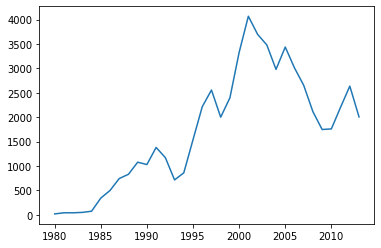

In [36]:
years = list(map(str,range(1980,2014)))
df_can.columns = list(map(str,df_can.columns))
df_can.loc['Afghanistan',years].plot(kind='line')
plt.show()

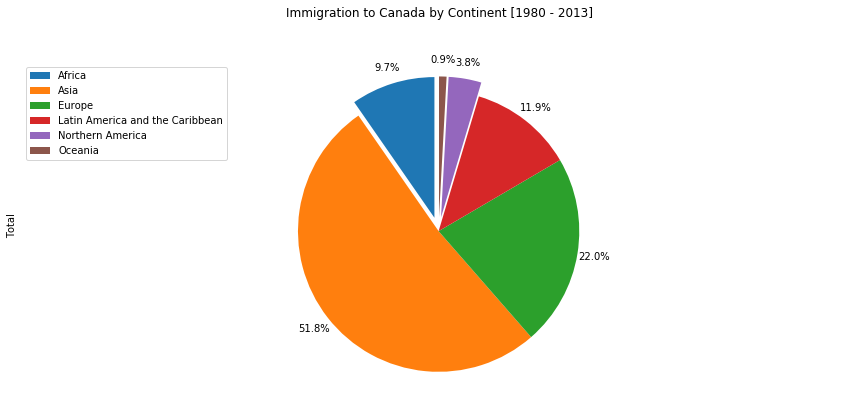

In [37]:
df_continents = df_can.groupby('Continent', axis=0).sum()
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind = 'pie',
                            figsize=(15,6),
                            startangle=90,     # start angle 90° (Africa)
                            labels = None,
                            explode=explode_list, # 'explode' lowest 3 continents
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            autopct='%1.1f%%')
plt.title('Immigration to Canada by Continent [1980 - 2013]',y = 1.12)
plt.legend(labels=df_continents.index, loc='upper left')
plt.axis('equal') 
plt.show()

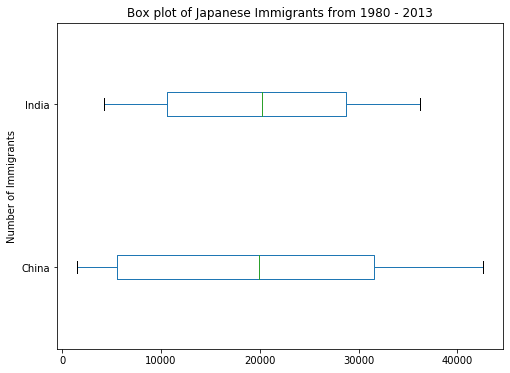

In [38]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['China','India'], years].transpose()
df_japan.head()
df_japan.plot(kind='box', figsize=(8, 6),vert = False)

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

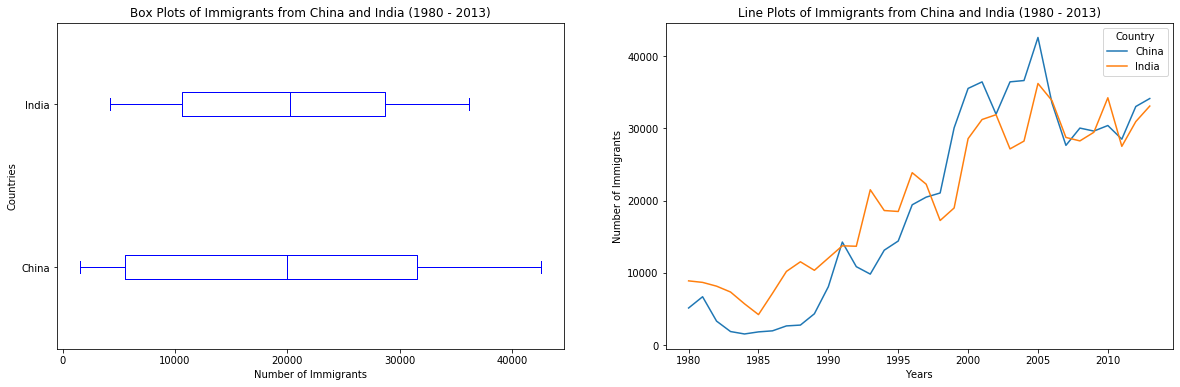

In [39]:

df_CI= df_can.loc[['China', 'India'], years].transpose()
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [40]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
print(df_tot.head())

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

           0
1980   99137
1981  110563
1982  104271
1983   75550
1984   73417


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


[-6.51110695e-05  5.20194055e-01 -1.29882974e+03  7.12671656e+02
  5.17877044e+09 -8.27528123e+12  4.13195384e+15]
143511.5


D:\miniconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


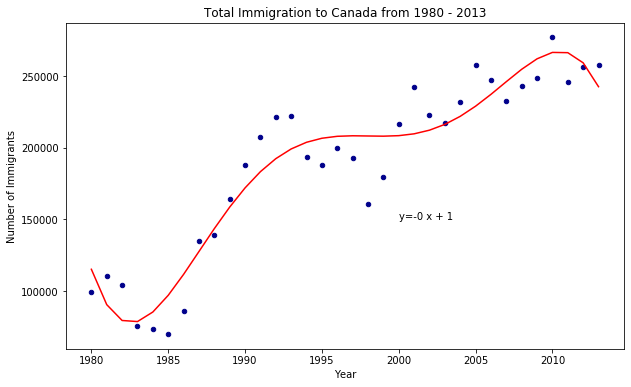

In [70]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y,deg =6)
print(fit)
p = np.poly1d(fit)
print(p(1988))
# plot line of best fit
plt.plot(x, p(x), color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))


plt.show()